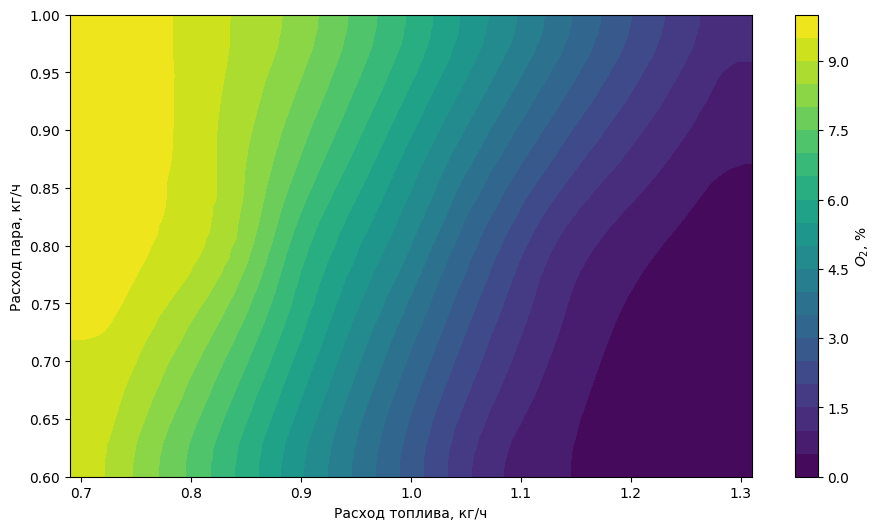

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('C:/Users/evils/PycharmProjects/RegimeMap')

# --- Чтение CSV (разделитель ; если нужен — укажи sep=";") ---
df = pd.read_csv("C:/Users/evils/PycharmProjects/RegimeMap/data/result/approx_diesel_steam_O2.csv", sep=",")

# Достаём столбцы
fuel = df["fuel"].values
additive = df["additive"].values
component = df["component"].values

# Проверяем, есть ли несколько разных значений additive
unique_add = df["additive"].unique()

if len(unique_add) == 1:
    # Для contourf нужна 2D поверхность → "расширяем" данные в 3 строки
    add_val = unique_add[0]
    additive_grid = np.array([add_val - 0.01, add_val, add_val + 0.01])

    fuel_grid, additive_grid = np.meshgrid(fuel, additive_grid)
    component_grid = np.vstack([component, component, component])

else:
    # Если данных достаточно — создаём нормальную сетку
    fuel_grid, additive_grid = np.meshgrid(
        np.sort(df["fuel"].unique()),
        np.sort(df["additive"].unique())
    )

    # Создаём матрицу component
    component_grid = np.full_like(fuel_grid, np.nan, dtype=float)
    for _, row in df.iterrows():
        i = np.where(np.sort(df["additive"].unique()) == row.additive)[0][0]
        j = np.where(np.sort(df["fuel"].unique()) == row.fuel)[0][0]
        component_grid[i, j] = row.component

# --- Построение графика ---
plt.figure(figsize=(11, 6))
contour = plt.contourf(fuel_grid, additive_grid, component_grid, levels=20)

plt.colorbar(contour, label=r"$O_2$, %")
plt.xlabel("Расход топлива, кг/ч")
plt.ylabel("Расход пара, кг/ч")
plt.show()

In [ ]:
folder = "C:/Users/evils/PycharmProjects/RegimeMap/data/result"   # ← замени на свой путь

Найдено файлов: 6
Обрабатываю: approx_diesel_steam_CO.csv


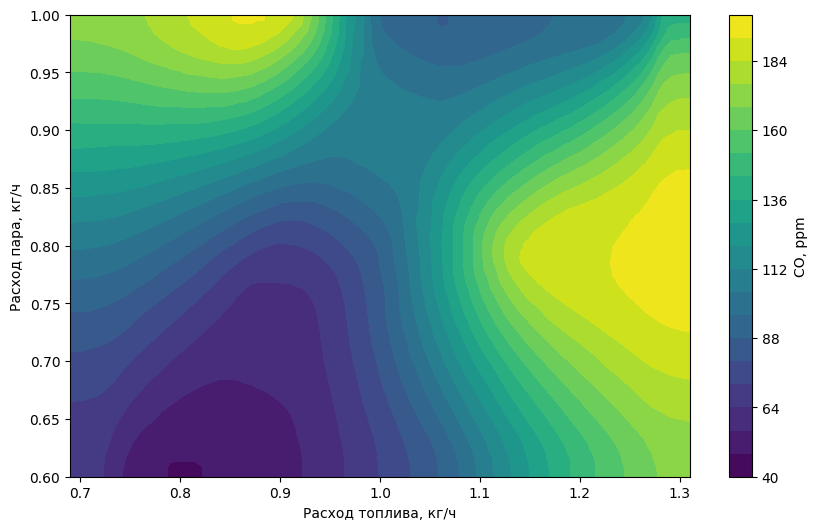

Обрабатываю: approx_diesel_steam_CO_new_burner.csv


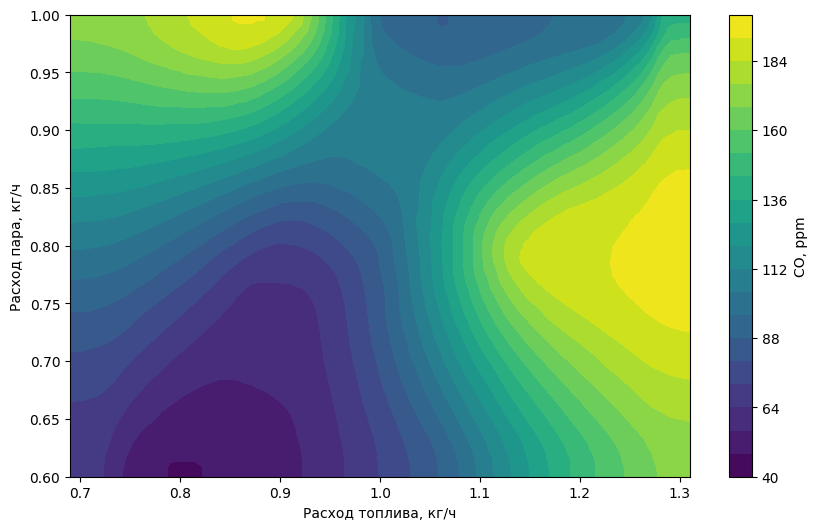

Обрабатываю: approx_diesel_steam_NO.csv


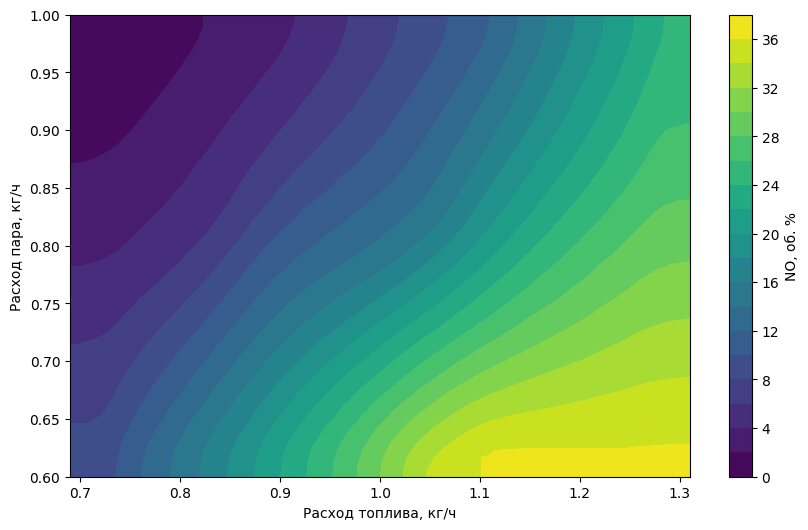

Обрабатываю: approx_diesel_steam_NO_new_burner.csv


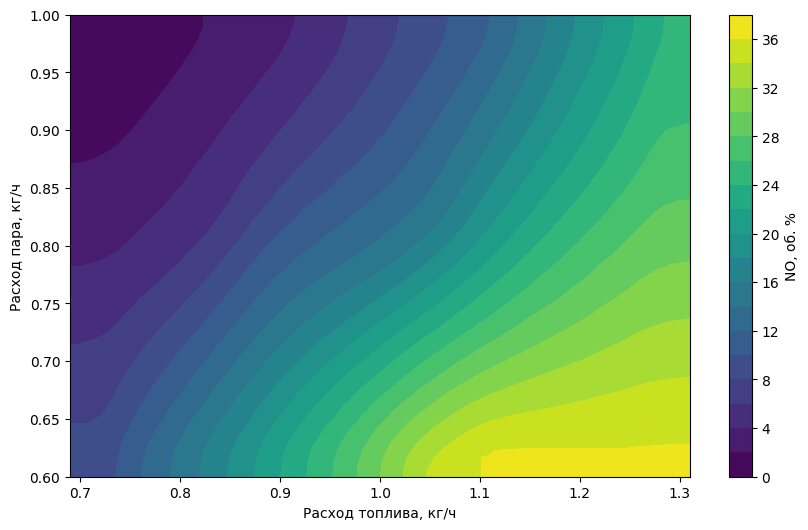

Обрабатываю: approx_diesel_steam_O2.csv


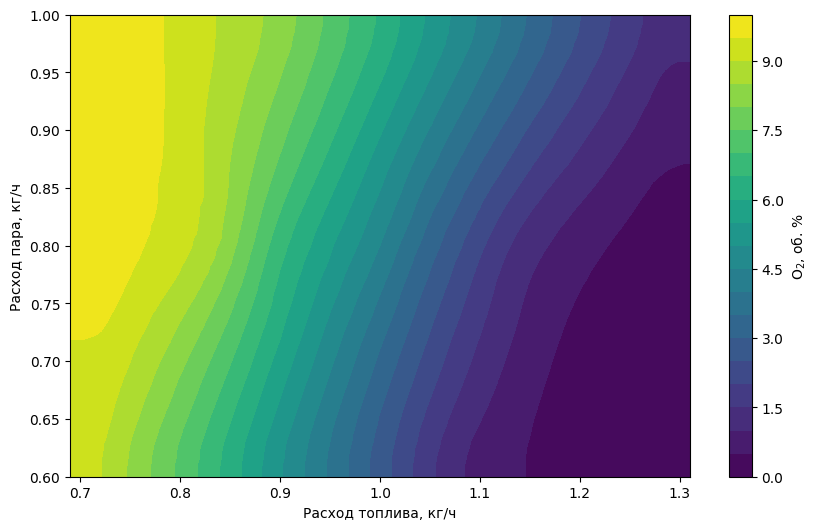

Обрабатываю: approx_diesel_steam_O2_new_burner.csv


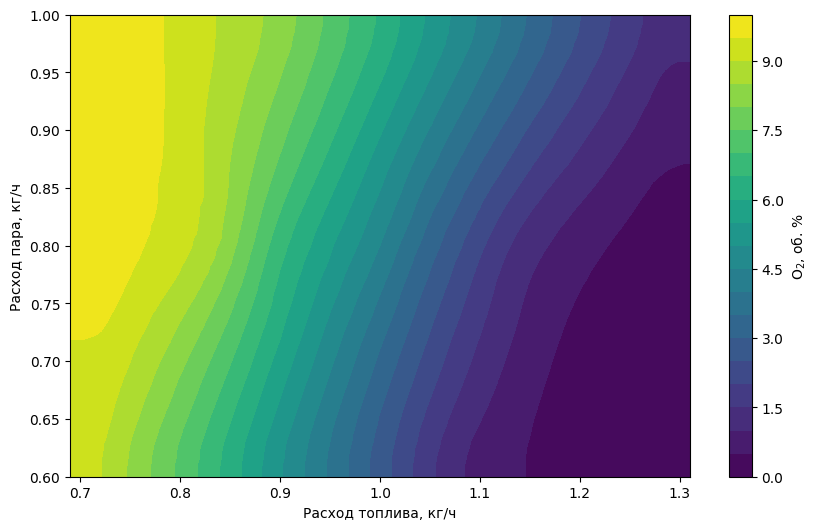

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# ====== Указываешь путь к папке ======
folder = "C:/Users/evils/PycharmProjects/RegimeMap/data/result"   # ← замени на свой путь

csv_files = glob(os.path.join(folder, "*.csv"))

print(f"Найдено файлов: {len(csv_files)}")


# ====== Определяем подпись компонента по имени файла ======
def get_component_label(filename: str) -> str:
    name = filename.lower()

    if "o2" in name or "o_2" in name:
        return r"O$_2$, об. %"
    if "no" in name:
        return "NO, об. %"
    if "co" in name:
        return "CO, ppm"

    # если компонент неизвестен — просто имя файла
    return "component"


# ====== Функция построения графика ======
def plot_contour_from_df(df, title, component_label):
    fuel = df["fuel"].values
    additive = df["additive"].values
    component = df["component"].values

    unique_add = df["additive"].unique()

    # --- Формирование поверхности ---
    if len(unique_add) == 1:
        add_val = unique_add[0]

        additive_grid = np.array([add_val - 0.01, add_val, add_val + 0.01])
        fuel_grid, additive_grid = np.meshgrid(fuel, additive_grid)
        component_grid = np.vstack([component, component, component])
    else:
        fuel_unique = np.sort(df["fuel"].unique())
        additive_unique = np.sort(df["additive"].unique())

        fuel_grid, additive_grid = np.meshgrid(fuel_unique, additive_unique)
        component_grid = np.full_like(fuel_grid, np.nan, dtype=float)

        for _, row in df.iterrows():
            i = np.where(additive_unique == row.additive)[0][0]
            j = np.where(fuel_unique == row.fuel)[0][0]
            component_grid[i, j] = row.component

    # --- Построение графика ---
    plt.figure(figsize=(10, 6))
    contour = plt.contourf(fuel_grid, additive_grid, component_grid, levels=20)

    # ВАЖНО: используем автоматически сгенерированный label
    plt.colorbar(contour, label=component_label)

    plt.xlabel("Расход топлива, кг/ч")
    plt.ylabel("Расход пара, кг/ч")
    plt.show()


# ====== Основной цикл по CSV-файлам ======
for file in csv_files:
    df = pd.read_csv(file, sep=",")

    filename = os.path.basename(file)
    print(f"Обрабатываю: {filename}")

    component_label = get_component_label(filename)

    plot_contour_from_df(df, title=filename, component_label=component_label)
